## Packages

In [5]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima.arima import auto_arima
!pip install arch
from arch import arch_model
!pip install yfinance
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the data

In [6]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, threads = True)

[*********************100%%**********************]  4 of 4 completed


In [7]:
df_comp = raw_data.copy()

In [8]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [9]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

## Creating Returns

In [10]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [11]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

## Splitting the Data

In [12]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Fitting a Model

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model_ar = ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

## Simple Forecasting

In [15]:
df.tail()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-09,1972.829956,9808.200195,6718.000000,15302.650391,0.464427,-0.304222,0.363568,-0.076789,-193.623849,39.056133,260.939581,-33.873062
2014-07-10,1964.680054,9659.129883,6672.399902,15216.469727,-0.413107,-0.678775,-1.519854,-0.563175,172.228229,87.141370,-1090.828512,-248.427258
2014-07-11,1967.569946,9666.339844,6690.200195,15164.040039,0.147092,0.266775,0.074644,-0.344559,-61.324138,-34.248669,53.573442,-151.991545
2014-07-14,1977.099976,9783.009766,6746.100098,15296.820312,0.484355,0.835549,1.206971,0.875626,-201.932230,-107.268090,866.266436,386.255523
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,-0.193210,-0.527714,-0.650103,0.642878,80.550866,67.748084,-466.591262,283.585757


In [16]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2014-07-16"
end_date = "2015-01-01"

In [17]:
df_pred = results_ar.predict(start = start_date, end = end_date)

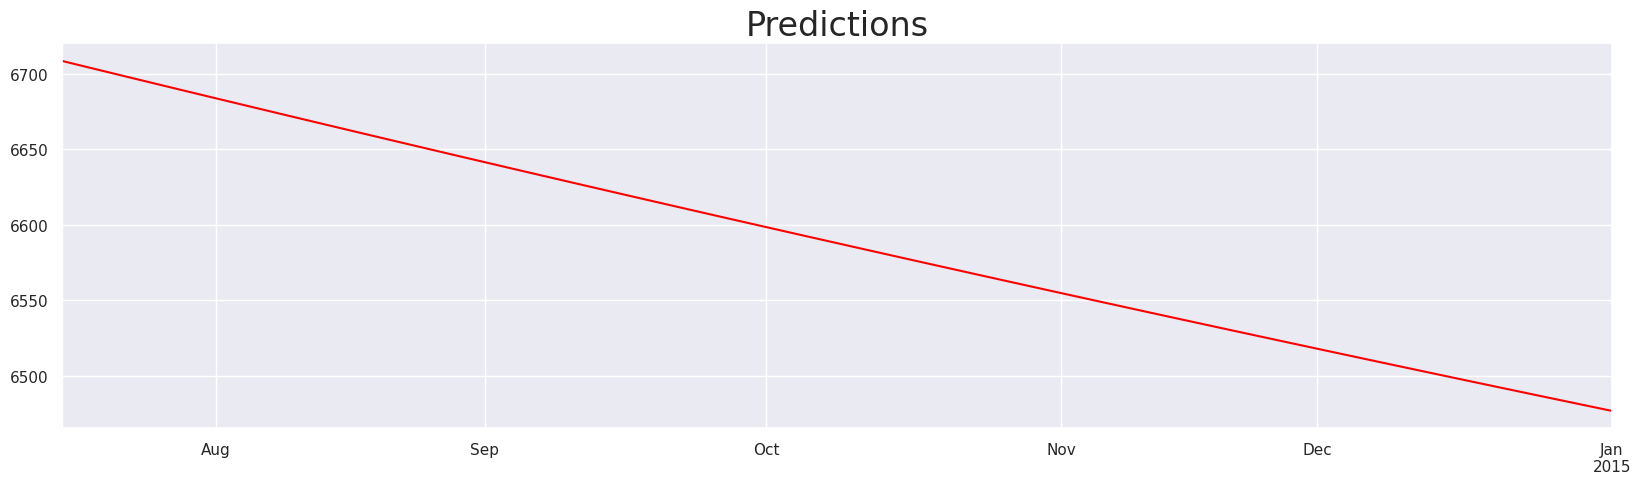

In [18]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
plt.title("Predictions", size = 24)
plt.show()

In [19]:
end_date = "2019-10-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

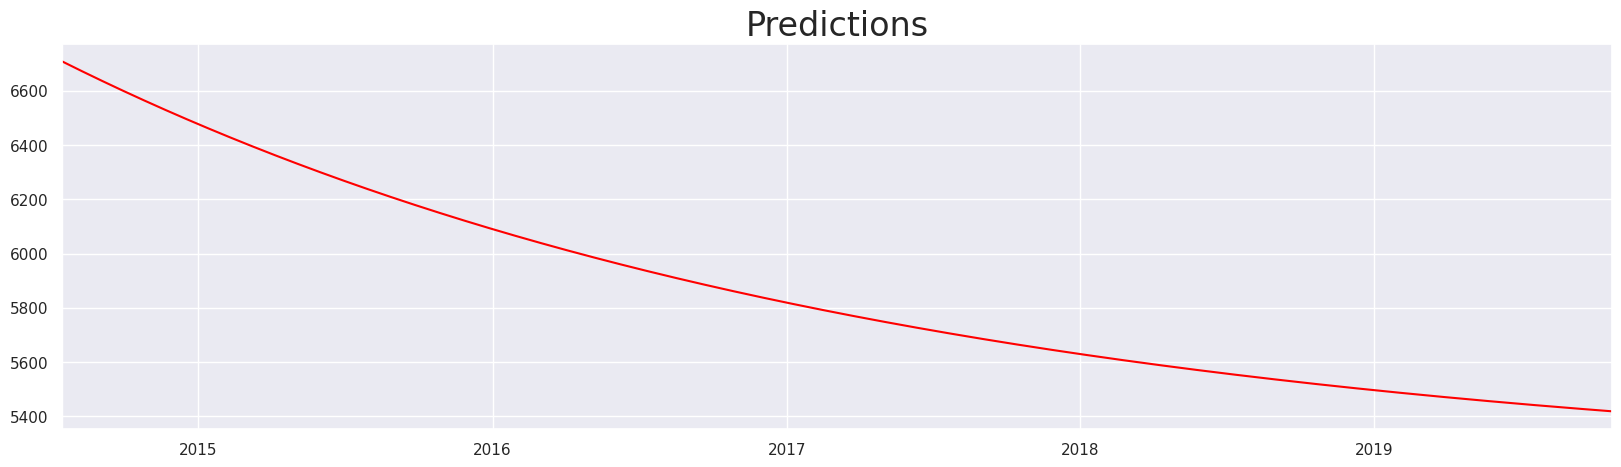

In [20]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
plt.title("Predictions", size = 24)
plt.show()

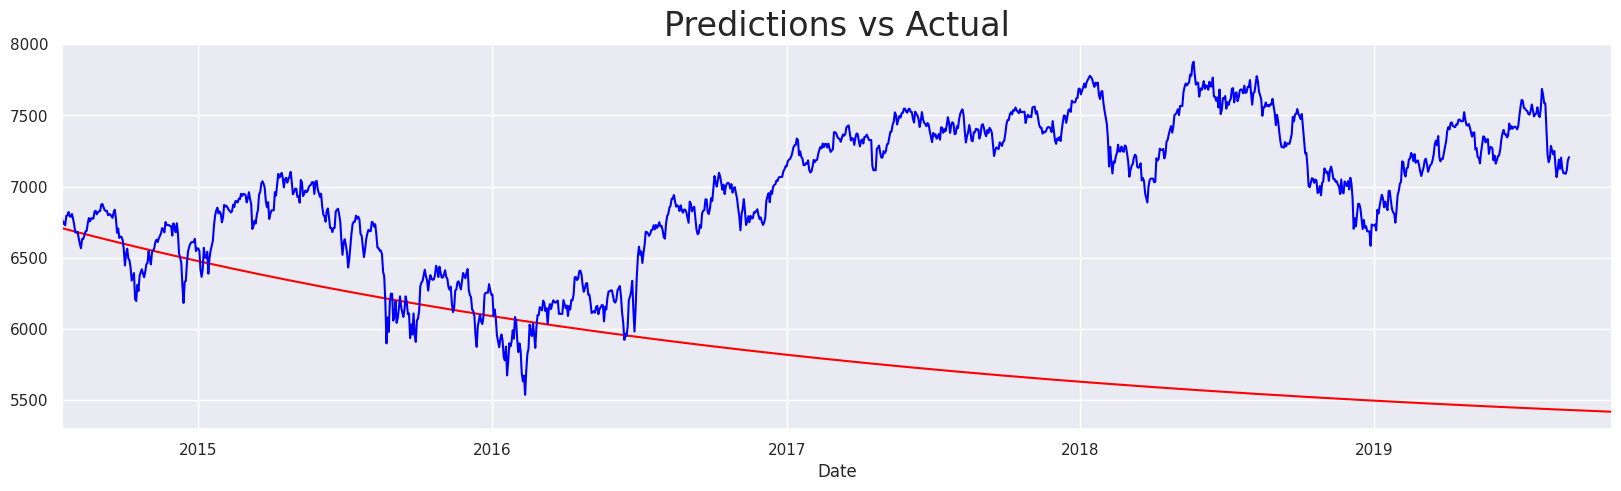

In [21]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Using Returns Instead

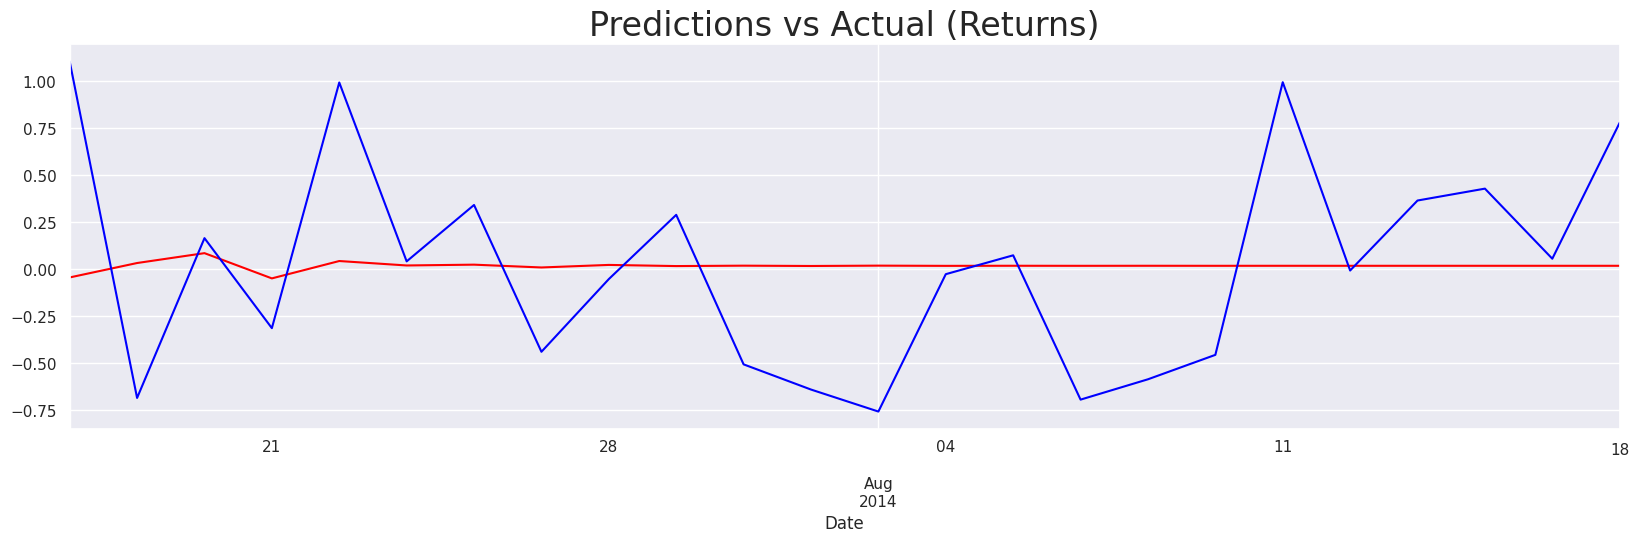

In [22]:
end_date = "2014-08-18"

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date) 

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [23]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5351
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -8306.931
Date:                Wed, 13 Mar 2024   AIC                          16627.862
Time:                        21:58:23   BIC                          16673.958
Sample:                    01-11-1994   HQIC                         16643.963
                         - 07-15-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.014      1.356      0.175      -0.009       0.047
ar.L1         -0.0214      0.009     -2.459      0.014      -0.038      -0.004
ar.L2         -0.0524      0.008     -6.858      0.000      -0.067      -0.037
ar.L3         -0.0804      0.008    -10.492      0.000      -0.095      -0.065
ar.L4          0.0423      0.008      5.335      0.000       0.027       0.058
ar.L5         -0.0572      0.008     -7.477      0.000      -0.072      -0.042
sigma2         1.3059      0.014     96.686      0.000       1.279       1.332
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              7325.62
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA

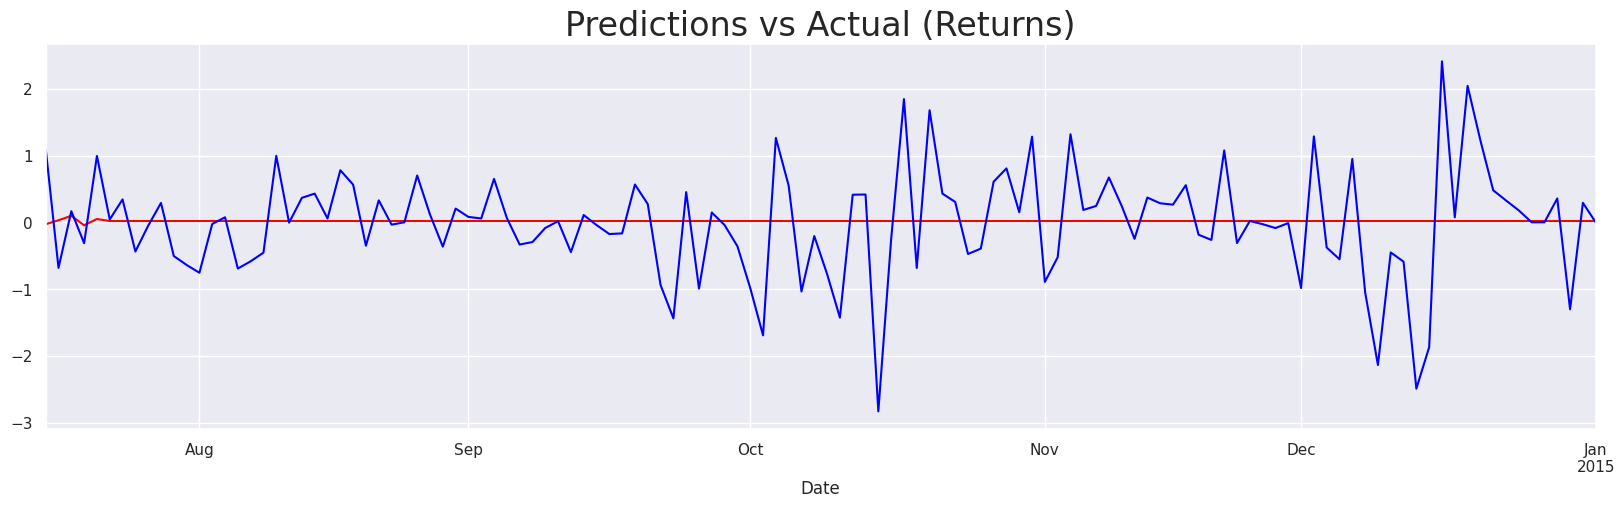

In [24]:
end_date = "2015-01-01"

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0,0,5))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end = end_date) 

df_pred_ma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [25]:
results_ret_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5351
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -8307.354
Date:                Wed, 13 Mar 2024   AIC                          16628.708
Time:                        21:58:25   BIC                          16674.803
Sample:                    01-11-1994   HQIC                         16644.808
                         - 07-15-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.014      1.362      0.173      -0.008       0.047
ma.L1         -0.0253      0.009     -2.860      0.004      -0.043      -0.008
ma.L2         -0.0481      0.008     -6.202      0.000      -0.063      -0.033
ma.L3         -0.0819      0.008    -10.562      0.000      -0.097      -0.067
ma.L4          0.0436      0.008      5.282      0.000       0.027       0.060
ma.L5         -0.0480      0.008     -6.276      0.000      -0.063      -0.033
sigma2         1.3061      0.014     96.007      0.000       1.279       1.333
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7311.87
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
df_pred_ma.head()

2014-07-16   -0.029372
2014-07-17    0.030304
2014-07-18    0.096968
2014-07-21   -0.045108
2014-07-22    0.049166
Freq: B, Name: predicted_mean, dtype: float64

### ARMA

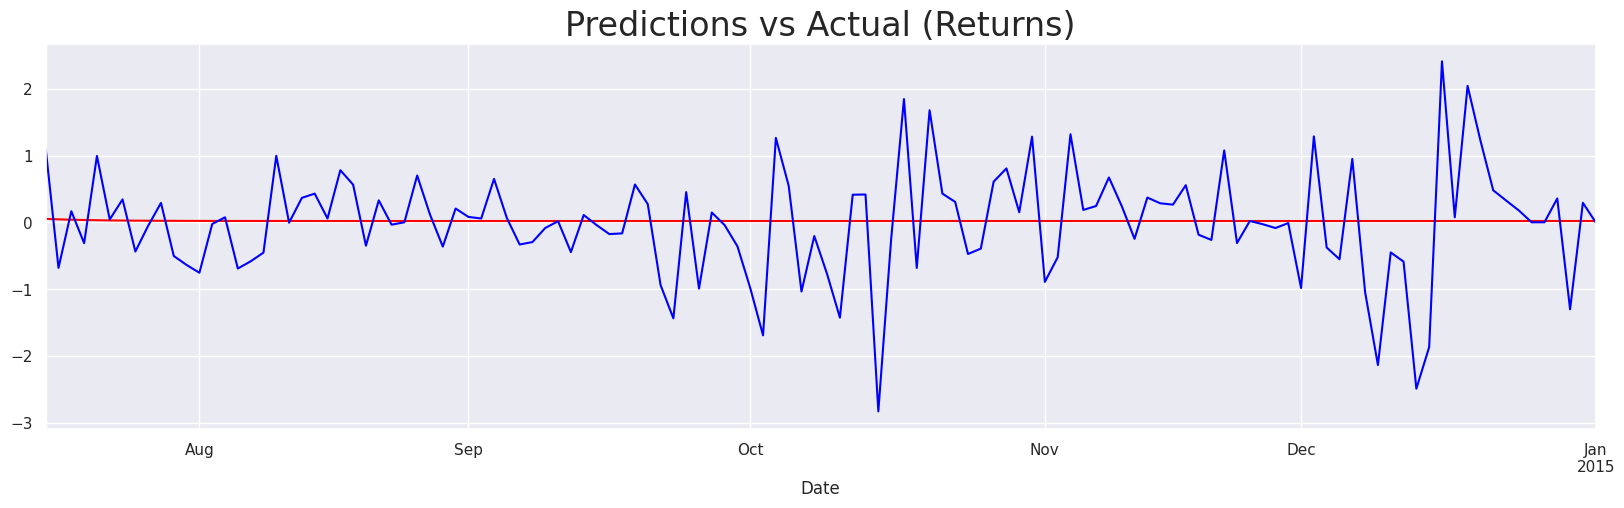

In [27]:
model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [28]:
df_pred_arma.head()

2014-07-16    0.051308
2014-07-17    0.044092
2014-07-18    0.038497
2014-07-21    0.034157
2014-07-22    0.030792
Freq: B, Name: predicted_mean, dtype: float64

In [29]:
df_pred_arma.tail()

2014-12-26    0.019164
2014-12-29    0.019164
2014-12-30    0.019164
2014-12-31    0.019164
2015-01-01    0.019164
Freq: B, Name: predicted_mean, dtype: float64

### ARMAX

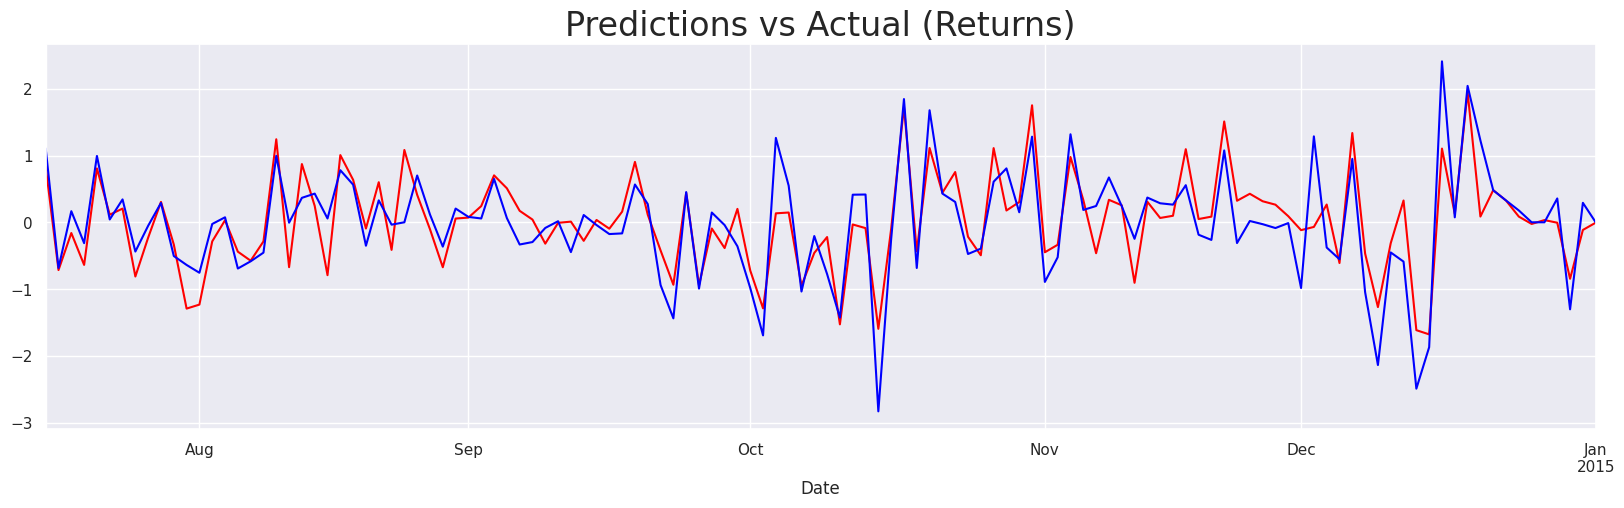

In [30]:
model_ret_armax = ARIMA(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

### SARMA

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55208D+00    |proj g|=  1.91557D-02


 This problem is unconstrained.



At iterate    5    f=  1.55186D+00    |proj g|=  3.41391D-03

At iterate   10    f=  1.55136D+00    |proj g|=  4.21005D-03

At iterate   15    f=  1.55135D+00    |proj g|=  5.78994D-04

At iterate   20    f=  1.55127D+00    |proj g|=  6.39329D-03

At iterate   25    f=  1.55118D+00    |proj g|=  1.16300D-03

At iterate   30    f=  1.55117D+00    |proj g|=  1.22226D-03

At iterate   35    f=  1.55101D+00    |proj g|=  1.27294D-02

At iterate   40    f=  1.55057D+00    |proj g|=  1.74870D-02

At iterate   45    f=  1.55040D+00    |proj g|=  2.68853D-03

At iterate   50    f=  1.55034D+00    |proj g|=  2.78628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

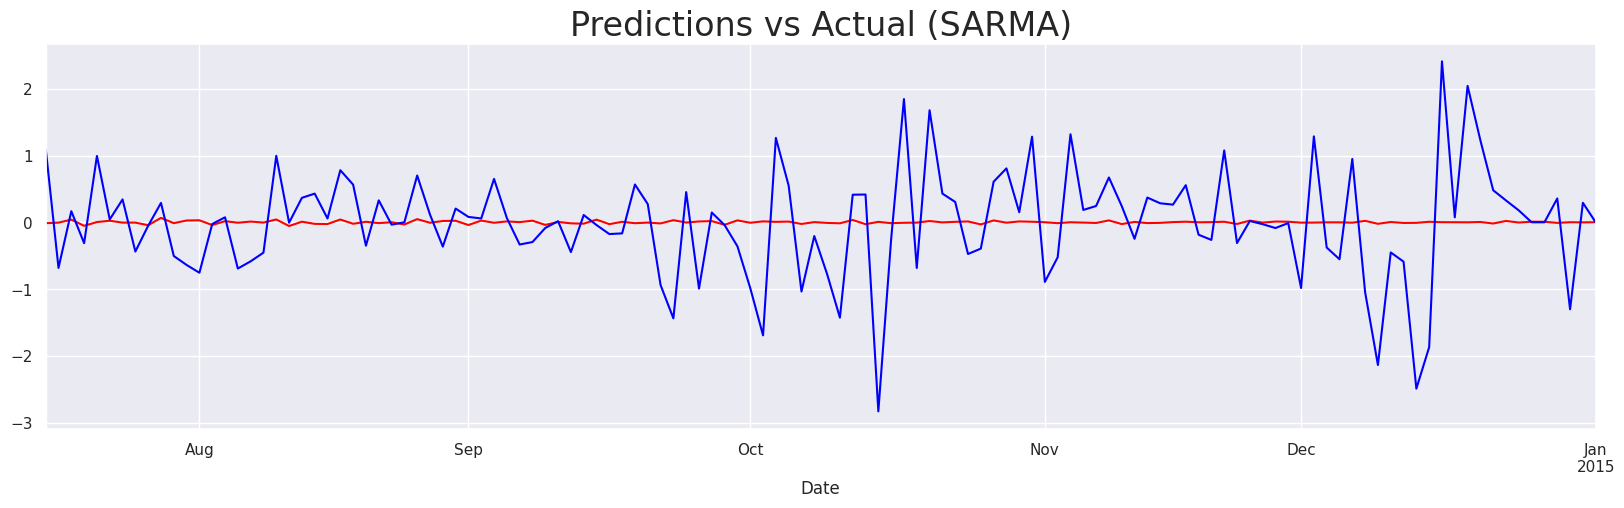

In [31]:
end_date = "2015-01-01"
model_ret_sarma = SARIMAX(df.ret_ftse[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start = start_date, end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

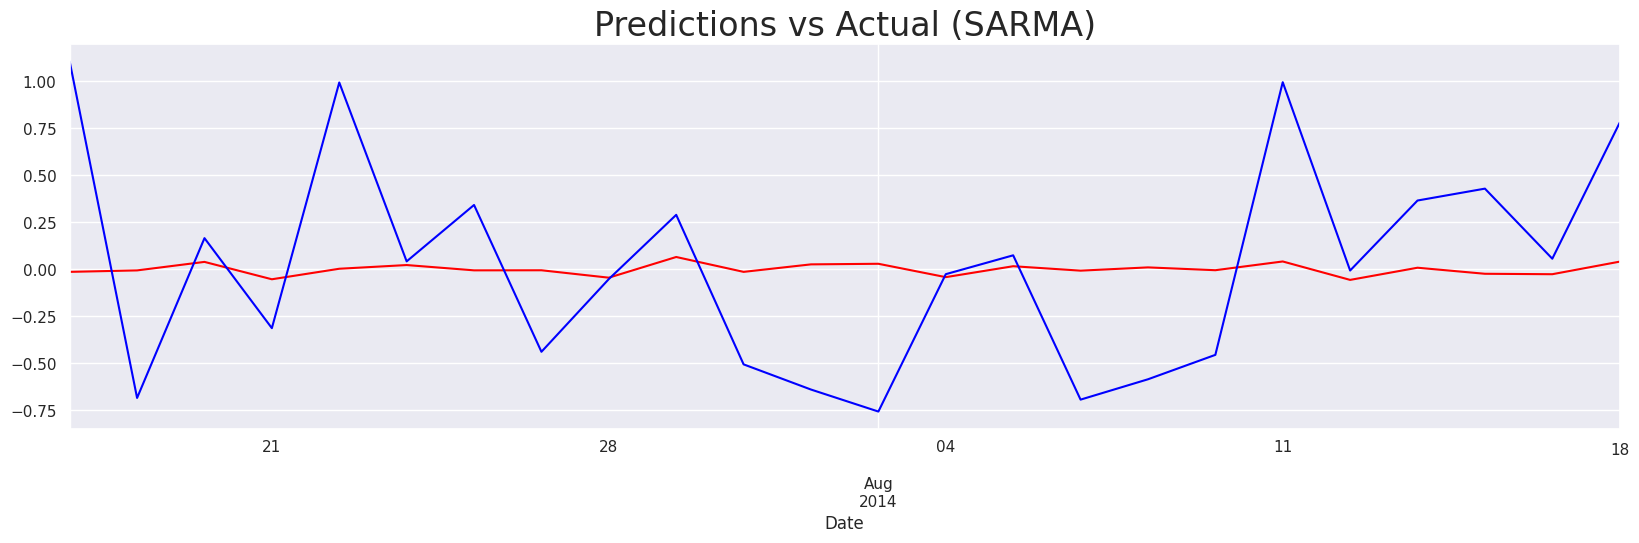

In [32]:
end_date = "2014-08-18"

df_pred_sarma = results_ret_sarma.predict(start = start_date, end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

### SARIMAX

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03658D+00    |proj g|=  2.99645D-02


 This problem is unconstrained.



At iterate    5    f=  1.03600D+00    |proj g|=  1.38780D-03

At iterate   10    f=  1.03599D+00    |proj g|=  3.59658D-03

At iterate   15    f=  1.03588D+00    |proj g|=  4.25158D-03

At iterate   20    f=  1.03587D+00    |proj g|=  2.28125D-04

At iterate   25    f=  1.03585D+00    |proj g|=  2.12893D-03

At iterate   30    f=  1.03559D+00    |proj g|=  7.34347D-03

At iterate   35    f=  1.03556D+00    |proj g|=  3.51750D-04

At iterate   40    f=  1.03556D+00    |proj g|=  3.05286D-04

At iterate   45    f=  1.03556D+00    |proj g|=  6.70569D-04

At iterate   50    f=  1.03551D+00    |proj g|=  2.96328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

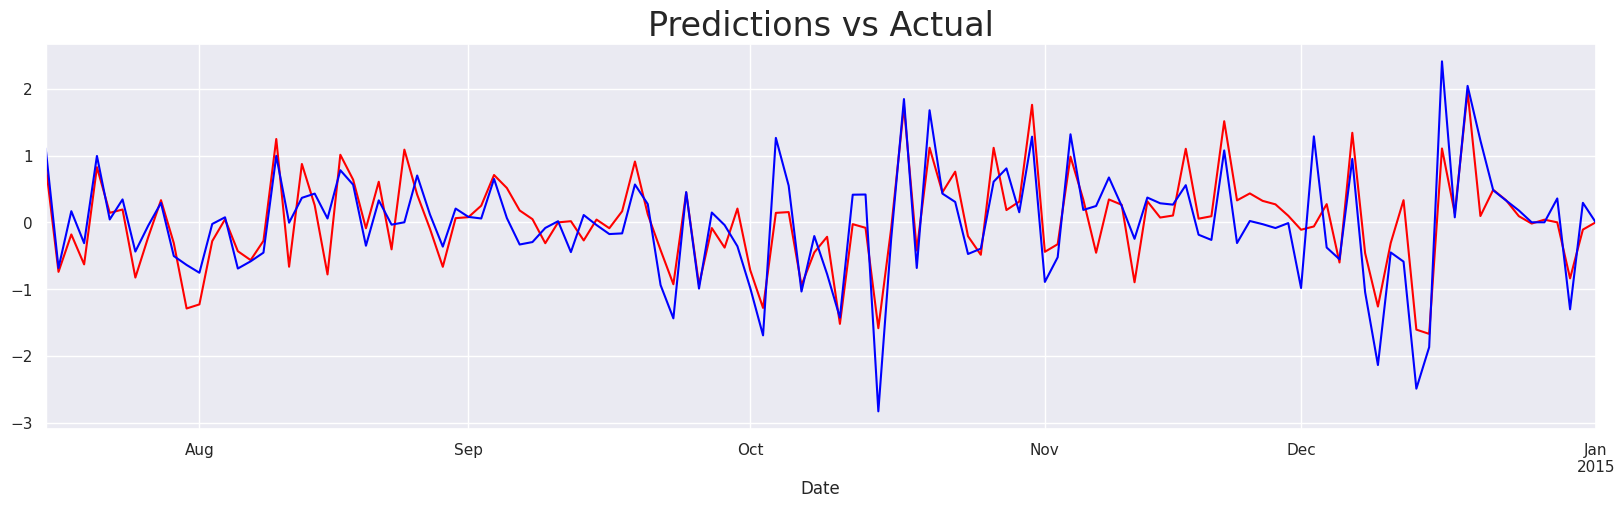

In [33]:
end_date = "2015-01-01"
model_ret_sarimax = SARIMAX(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], 
                            order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                              exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Auto ARIMA

In [34]:
model_auto0 = auto_arima(df.ret_ftse[1:])

In [35]:
df_auto_pred0 = pd.DataFrame(model_auto0.predict(n_periods = len(df_test[start_date:end_date])), index = df_test[start_date:end_date].index)

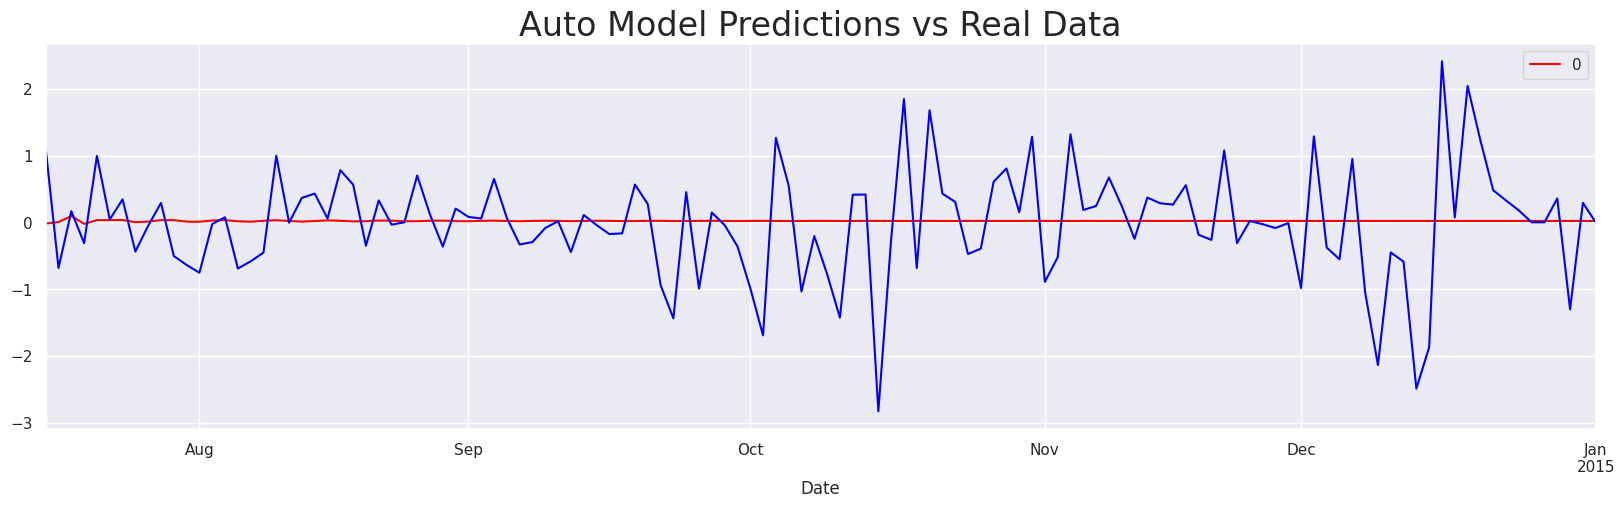

In [36]:
df_auto_pred0.plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [37]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                       m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [38]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

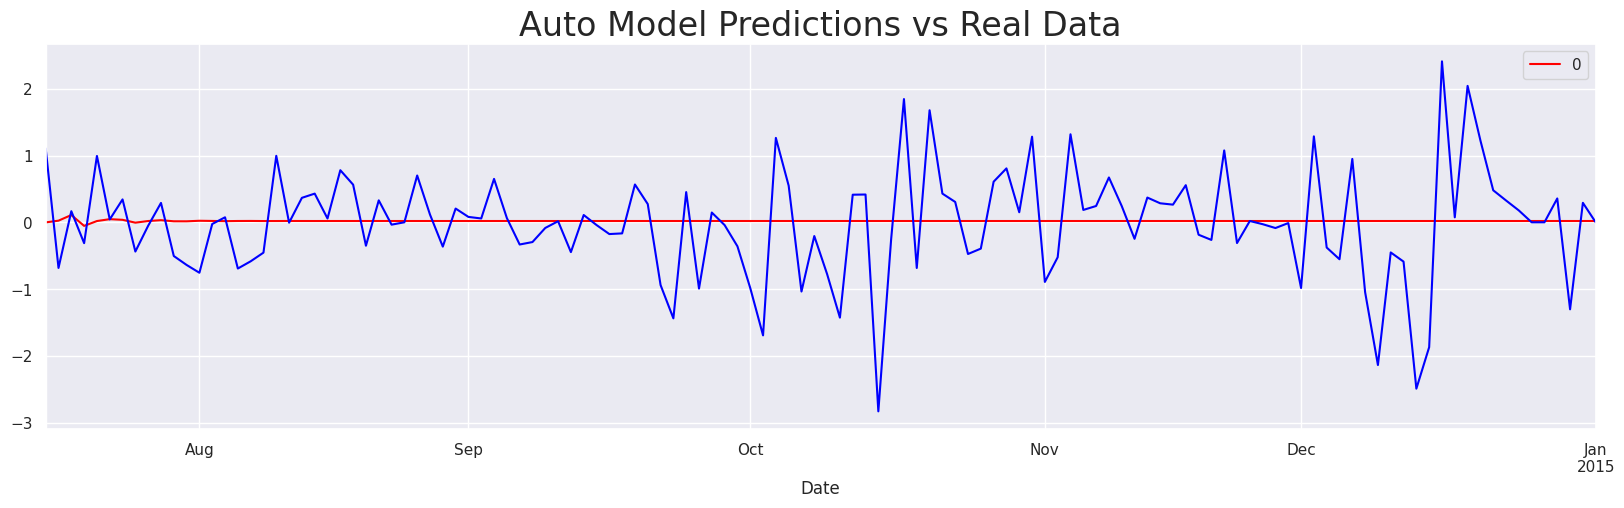

In [39]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

### Comparing All the Models (Returns)

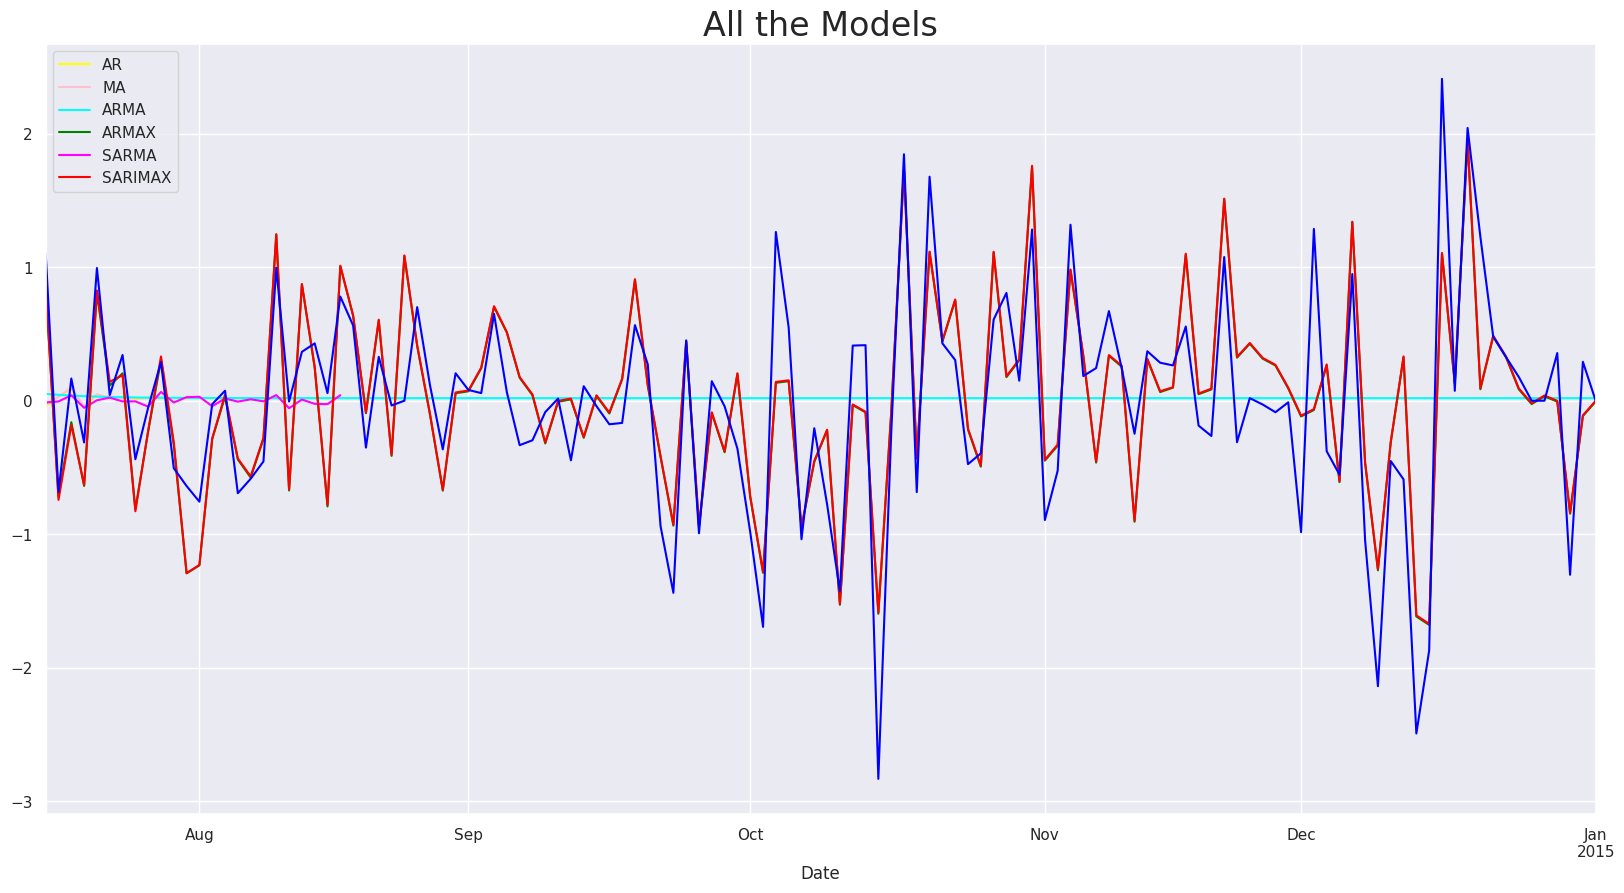

In [40]:
end_date = "2015-01-01"
df_pred_ar[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_arma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")
df_pred_sarma[start_date:end_date].plot(color = "magenta")
df_pred_sarimax[start_date:end_date].plot(color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models", size = 24)
plt.show()

### Forecasting Volatility

In [41]:
mod_garch = arch_model(df_comp.ret_ftse[1:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
res_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 7310.616015102245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7310.616005371508
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


In [42]:
pred_garch = res_garch.forecast(horizon = 1, align = 'target')

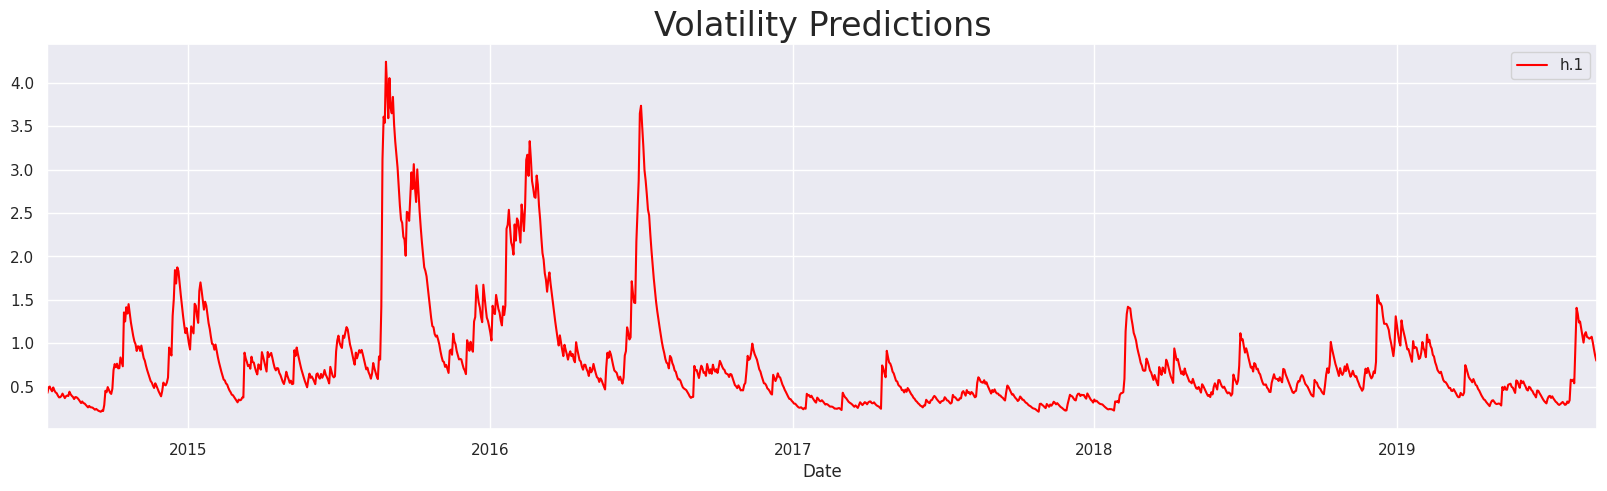

In [43]:
pred_garch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
plt.title("Volatility Predictions", size = 24)
plt.show()

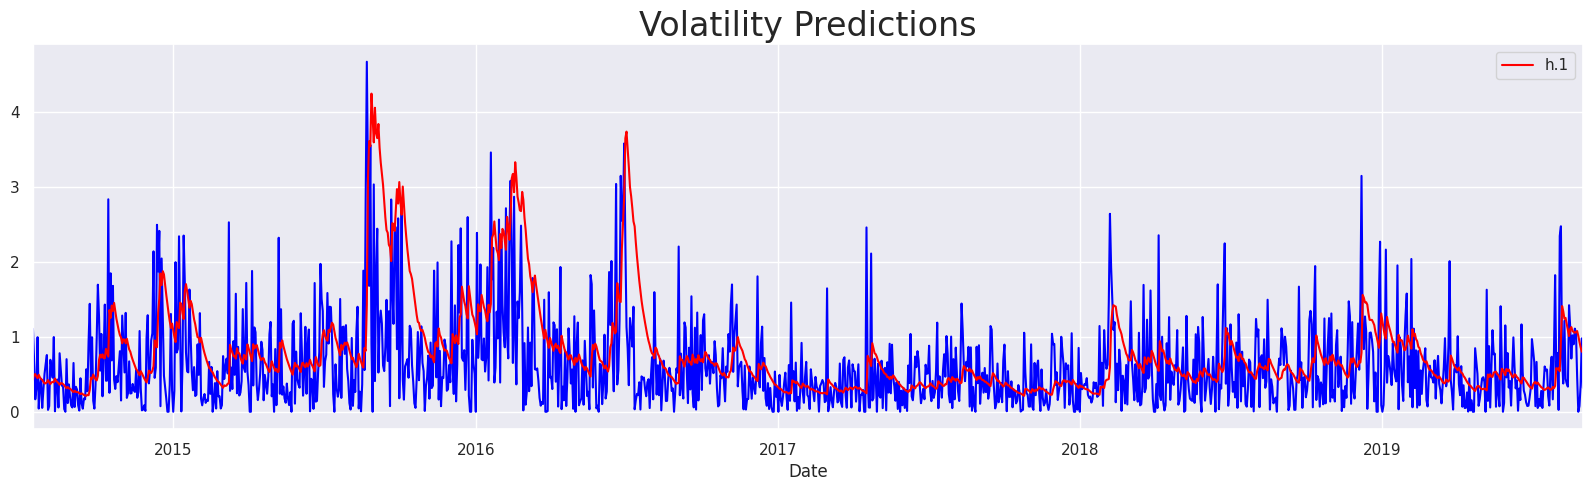

In [44]:
pred_garch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
df_test.ret_ftse.abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()

In [45]:
pred_garch = res_garch.forecast(horizon = 100, align = 'target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-30,0.810953,0.805082,0.866929,0.940634,1.021137,1.085725,1.074809,1.06858,1.082128,1.091659,...,0.841664,0.843269,0.834763,0.820076,0.831594,0.8437,0.854891,0.868261,0.875739,0.890048


### Multivariate Regression Model

In [46]:
from statsmodels.tsa.api import VAR

In [47]:
df_ret = df[['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

In [48]:
model_var_ret = VAR(df_ret)
model_var_ret.select_order(20)
results_var_ret = model_var_ret.fit(ic = 'aic')

In [49]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Mar, 2024
Time:                     22:05:21
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.328077
Nobs:                     5346.00    HQIC:                  0.260760
Log likelihood:          -30859.0    FPE:                    1.25185
AIC:                     0.224624    Det(Omega_mle):         1.23237
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.039221         0.016160            2.427           0.015
L1.ret_spx           -0.110815         0.017560           -6.310           0.000
L1.ret_dax            0.064819         0.019027           

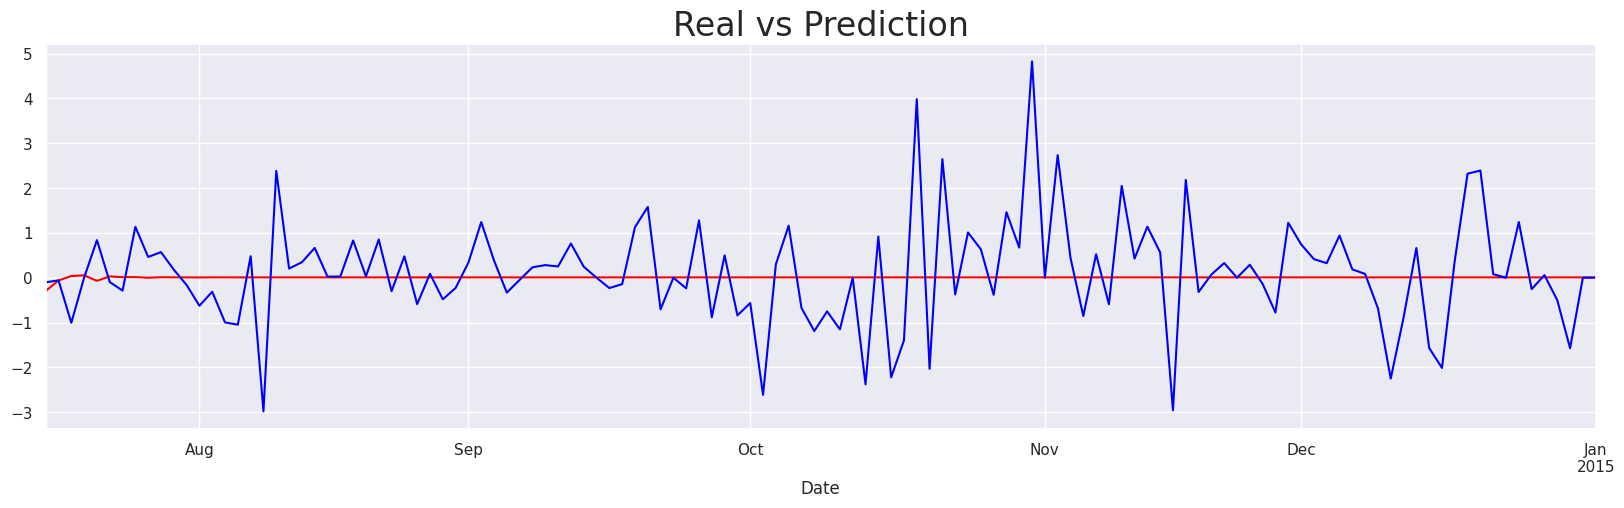

In [50]:
lag_order_ret = results_var_ret.k_ar
var_pred_ret = results_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame(data = var_pred_ret, index = df_test[start_date:end_date].index,
                                columns = df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize = (20,5), color = "red")

df_test.ret_nikkei[start_date:end_date].plot(color = "blue")
plt.title("Real vs Prediction", size = 24)
plt.show()

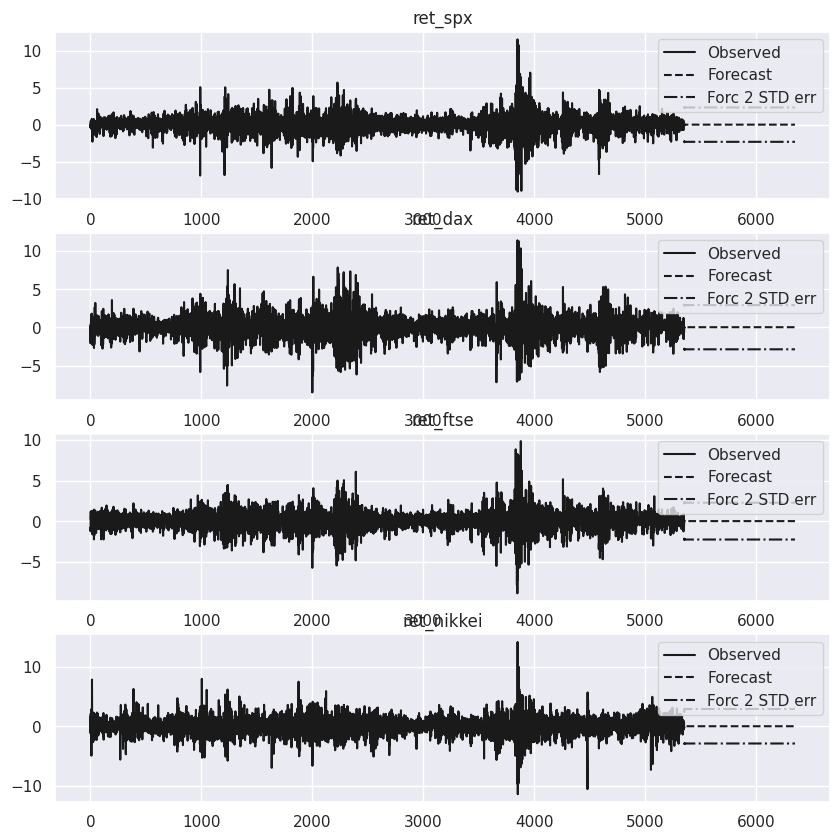

In [51]:
results_var_ret.plot_forecast(1000)
plt.show()